# EXPLORATORY DATA ANALYSIS ON A DATASET

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [25]:
df=pd.read_csv("cardiotocographic.csv")
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

### 1.	Data Cleaning and Preparation:

#### missing values

In [26]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [27]:
for i in df.columns:
    df[i].fillna(df[i].mean() , inplace = True)

In [28]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(2)

In [30]:
# Duplicates value removing
df.drop_duplicates(inplace=True,ignore_index=True)

In [31]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.describe().T

count        mean        std         min         25%         50%  \
LB        2124.0  133.342039  11.212396   51.842487  126.000000  133.000000   
AC        2124.0    0.003220   0.004371   -0.019284    0.000000    0.001668   
FM        2124.0    0.009904   0.067571   -0.480634    0.000000    0.000000   
UC        2124.0    0.004394   0.003340   -0.014925    0.001858    0.004486   
DL        2124.0    0.001897   0.003344   -0.015393    0.000000    0.000000   
DS        2124.0    0.000003   0.000141   -0.001353    0.000000    0.000000   
DP        2124.0    0.000175   0.000836   -0.005348    0.000000    0.000000   
ASTV      2124.0   47.012459  18.812403  -63.000000   32.000000   49.000000   
MSTV      2124.0    1.364345   1.174084   -6.600000    0.700000    1.200000   
ALTV      2124.0   10.295650  21.212676  -91.000000    0.000000    0.000000   
MLTV      2124.0    8.280589   7.736420  -50.700000    4.600000    7.500000   
Width     2124.0   70.460738  42.726905 -174.000000   37.000000   68.000000   
Tendency  2124.0    0.316669   0.642653   -3.000000    0.000000    0.000000   
NSP       2124.0    1.304794   0.641660   -1.025988    1.000000    1.000000   

                 75%         max  
LB        140.000000  214.000000  
AC          0.005612    0.038567  
FM          0.002568    0.961268  
UC          0.006536    0.030002  
DL          0.003292    0.030769  
DS          0.000000    0.002706  
DP          0.000000    0.010695  
ASTV       61.000000  162.000000  
MSTV        1.700000   13.800000  
ALTV       11.000000  182.000000  
MLTV       10.800000  101.400000  
Width     100.000000  357.000000  
Tendency    1.000000    3.000000  
NSP         1.000000    5.000000

In [40]:
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


## outlier removing

<Axes: >

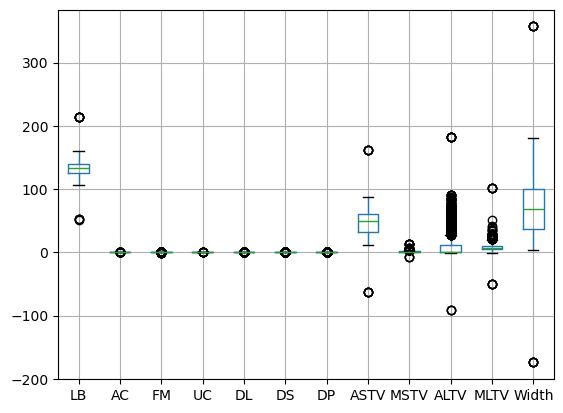

In [13]:
df.boxplot()

In [14]:
# outliers capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)



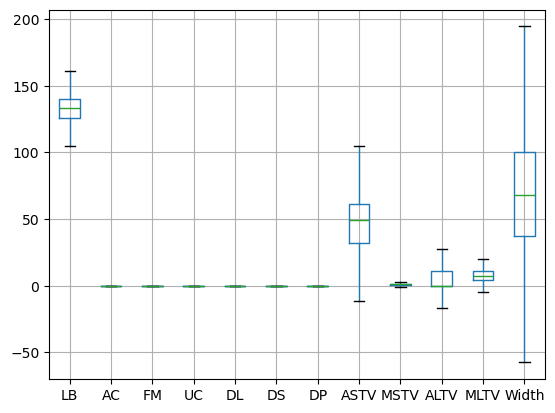

In [15]:
df.boxplot()
plt.show()

# 2.	Statistical Summary:

In [43]:
central_tendency=df.describe().T

In [44]:
central_tendency.head()

count        mean        std        min         25%         50%  \
LB  2124.0  133.342039  11.212396  51.842487  126.000000  133.000000   
AC  2124.0    0.003220   0.004371  -0.019284    0.000000    0.001668   
FM  2124.0    0.009904   0.067571  -0.480634    0.000000    0.000000   
UC  2124.0    0.004394   0.003340  -0.014925    0.001858    0.004486   
DL  2124.0    0.001897   0.003344  -0.015393    0.000000    0.000000   

           75%         max  
LB  140.000000  214.000000  
AC    0.005612    0.038567  
FM    0.002568    0.961268  
UC    0.006536    0.030002  
DL    0.003292    0.030769

In [47]:
central_tendency['median']=df.median()
central_tendency['median']

LB          133.000000
AC            0.001668
FM            0.000000
UC            0.004486
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.500000
Width        68.000000
Tendency      0.000000
NSP           1.000000
Name: median, dtype: float64

In [48]:
central_tendency.head()

count        mean        std        min         25%         50%  \
LB  2124.0  133.342039  11.212396  51.842487  126.000000  133.000000   
AC  2124.0    0.003220   0.004371  -0.019284    0.000000    0.001668   
FM  2124.0    0.009904   0.067571  -0.480634    0.000000    0.000000   
UC  2124.0    0.004394   0.003340  -0.014925    0.001858    0.004486   
DL  2124.0    0.001897   0.003344  -0.015393    0.000000    0.000000   

           75%         max      median  
LB  140.000000  214.000000  133.000000  
AC    0.005612    0.038567    0.001668  
FM    0.002568    0.961268    0.000000  
UC    0.006536    0.030002    0.004486  
DL    0.003292    0.030769    0.000000

In [50]:
central_tendency['mean']=df.mean()
central_tendency['mean']

LB          133.342039
AC            0.003220
FM            0.009904
UC            0.004394
DL            0.001897
DS            0.000003
DP            0.000175
ASTV         47.012459
MSTV          1.364345
ALTV         10.295650
MLTV          8.280589
Width        70.460738
Tendency      0.316669
NSP           1.304794
Name: mean, dtype: float64

# visualization

In [51]:
numerical_columns = df.select_dtypes(include=[float, int])
numerical_columns

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2119  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2120  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2121  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2123  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2119   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2120   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2121   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2122   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2123   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2124 rows x 14 columns]

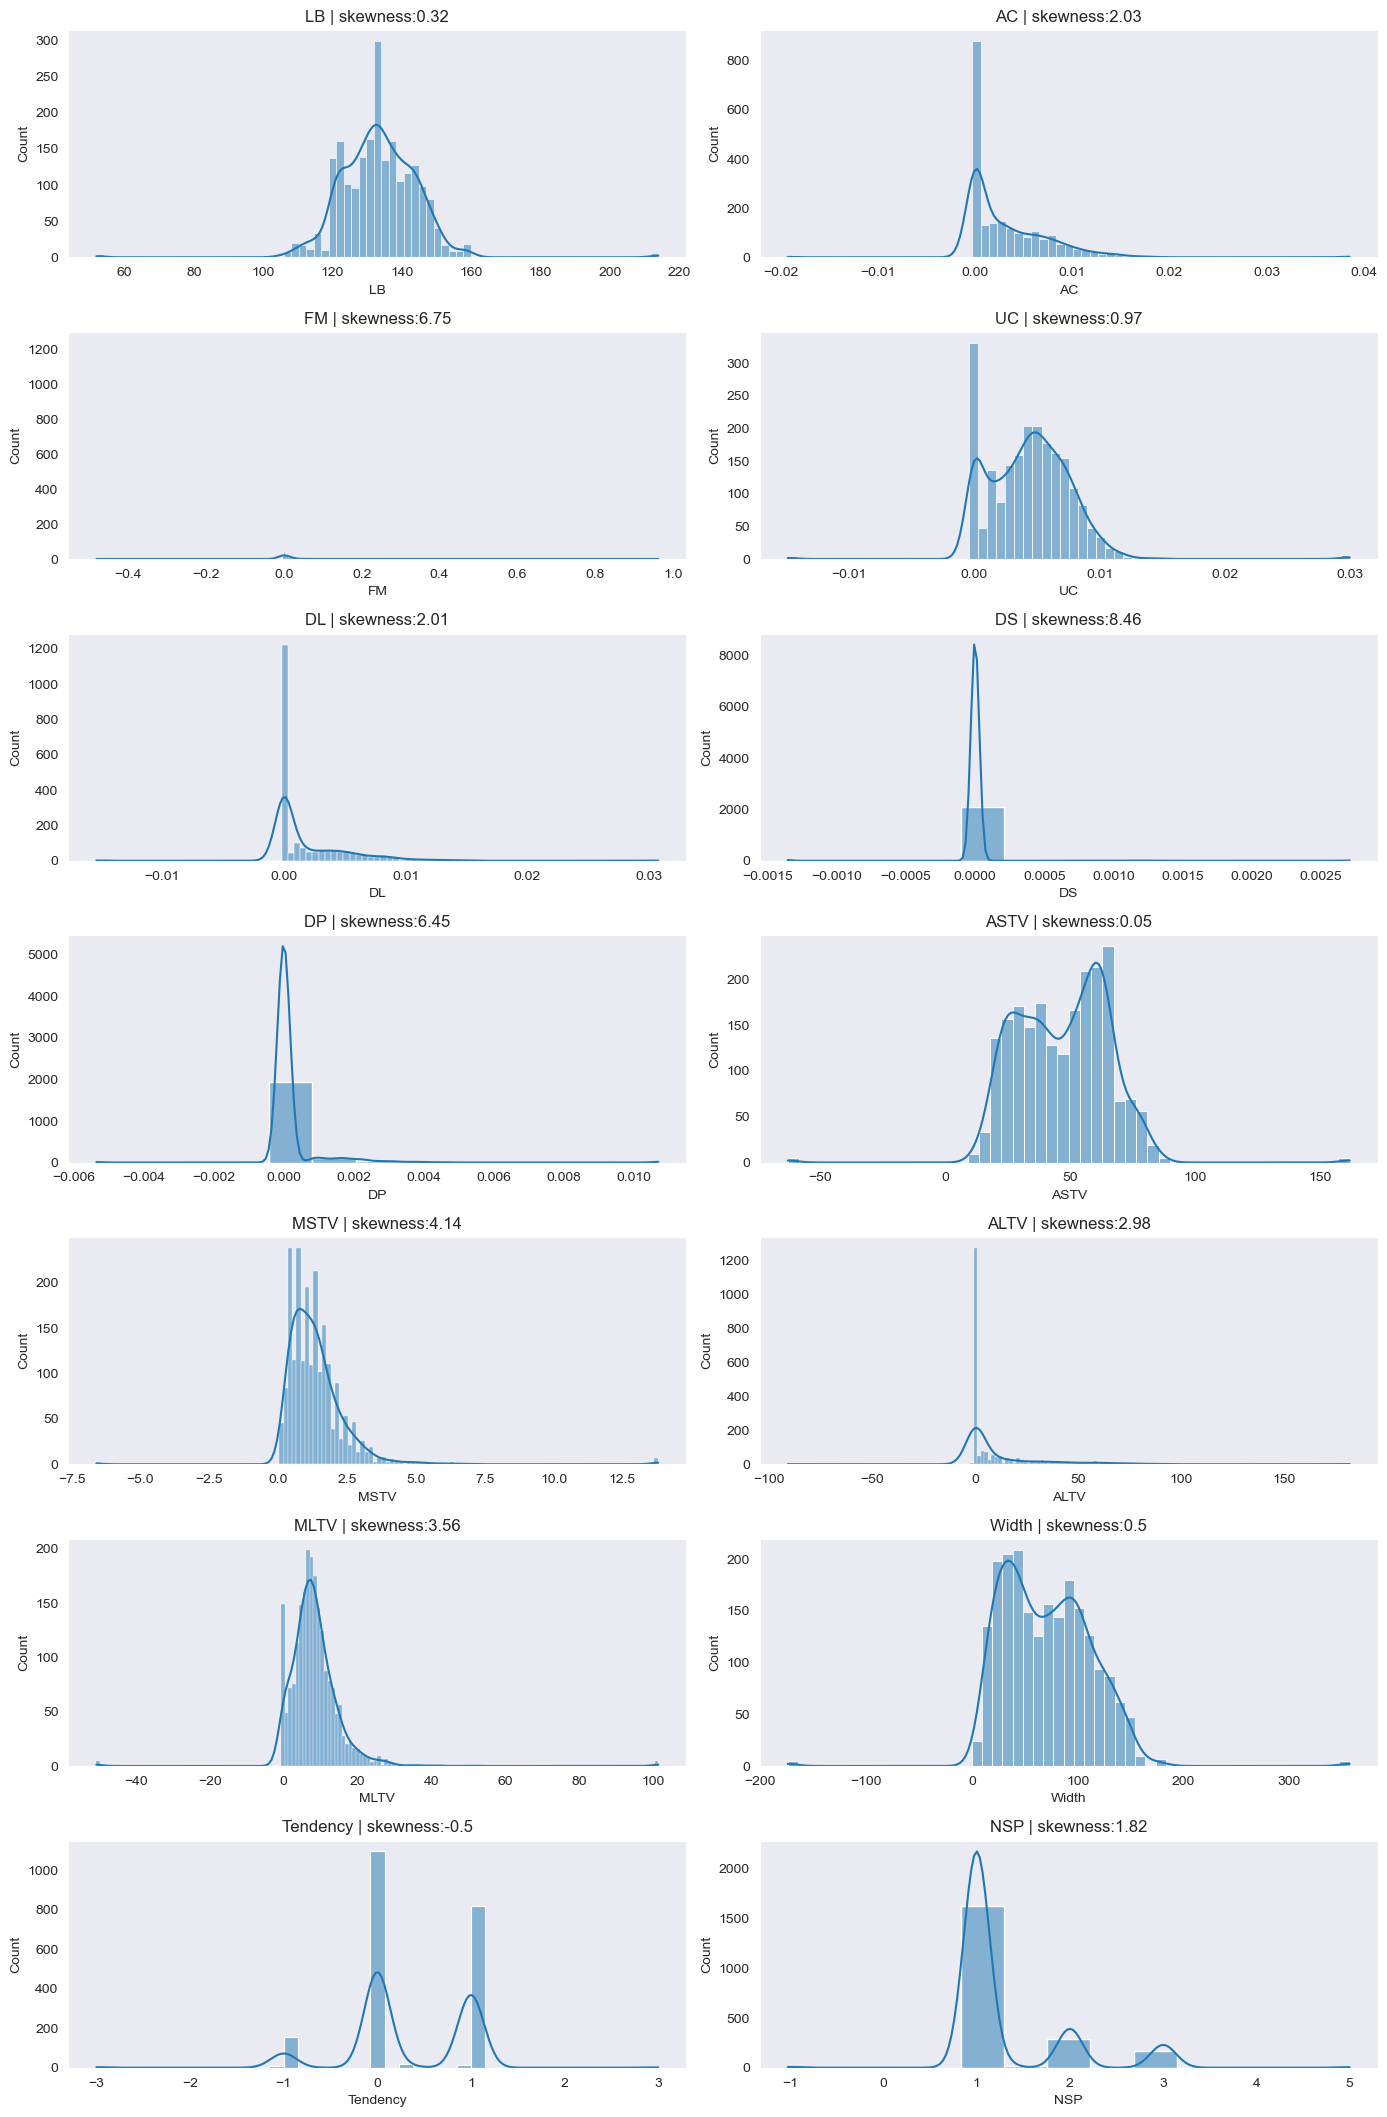

In [53]:
sns.set_style('dark')
plt.figure(figsize=(14, len(df.columns) * 3))
for idx,feature in enumerate(df.columns,1):
    plt.subplot(len(df.columns),2,idx)
    sns.histplot(df[feature],kde=True)
    plt.title(f'{feature} | skewness:{round(df[feature].skew(),2)}')
plt.tight_layout()
plt.show()

In [55]:
bins = [-float('inf'), 120, 160, float('inf')]
labels = ['bradycardia', 'Normal', 'tachycardia']
df['cat_lb'] = pd.cut(df['LB'], bins=bins, labels=labels)

In [57]:
value_counts=df['cat_lb'].value_counts()
print(value_counts)

cat_lb
Normal         1923
bradycardia     195
tachycardia       6
Name: count, dtype: int64


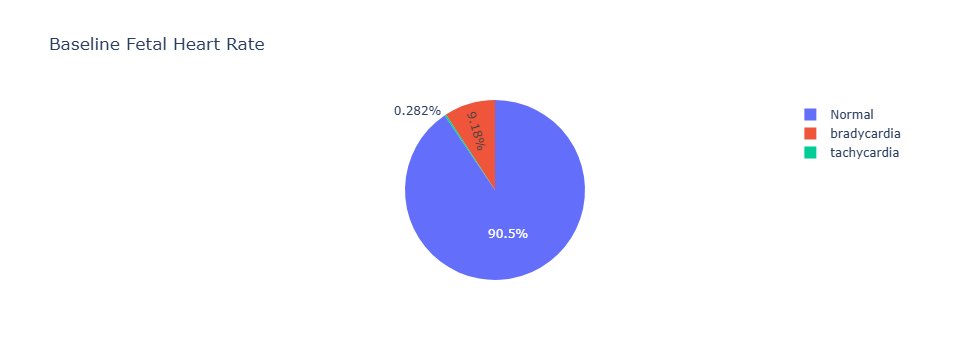

In [60]:
import plotly.express as px
ax=px.pie(df,names="cat_lb" ,title="Baseline Fetal Heart Rate")
ax.show()

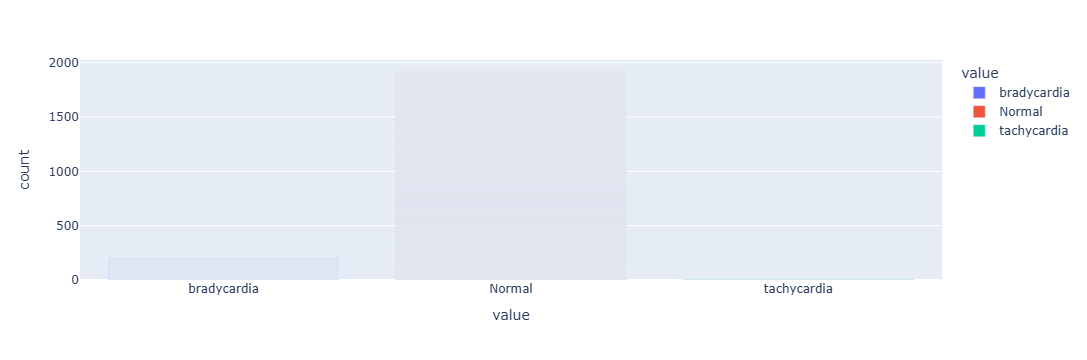

In [62]:
ax=px.bar(df["cat_lb"],color="value")
ax.show()

In [64]:
df["NSP"].unique()

array([ 2.        ,  1.        ,  3.        , -1.025988  ,  1.01084882,
        0.99671416,  1.30450718,  3.00453507,  0.99775653,  5.        ,
        1.01334917,  0.99792058,  1.00336665,  1.01749703,  1.01503495,
        0.99796582,  1.00733543,  0.98342028,  2.00660501,  2.01817732,
        2.00412825, -1.        ,  0.99418412,  1.01828761,  1.99573874,
        1.0107802 ,  1.99416358,  1.00377816,  0.97544038,  0.99223419,
        0.99768784,  1.96492092,  0.98122639,  0.99120013,  0.98483388,
        2.97130924,  0.99284679,  1.00350971,  0.99597399,  3.0191516 ,
        3.01518503,  1.99747195,  0.97973798,  2.01631524,  2.03516005,
        1.99860173,  0.99167495,  0.98839285,  1.00817061,  0.98749813,
        0.99379572,  0.98900567,  0.99634758,  1.0003288 ,  1.01821721,
        1.02128352,  0.99106613,  1.01663825,  1.00206333,  0.98145959,
        1.00068221,  1.00026942,  1.00615323,  0.9959162 ,  1.0198268 ,
        0.97230458,  0.9670755 ,  1.00542202,  0.98479205,  1.00

In [67]:

bins = [-float('inf'), 1, 2, 3]  
labels = ['Normal', 'suspect', 'tachycardia']
df['cat_lb'] = pd.cut(df['LB'], bins=bins, labels=labels)

In [69]:
import numpy as np
conditions = [
    (df['NSP'] == 1),  
    (df['NSP'] == 2),  
    (df['NSP'] == 3)   
]
categories = ['Normal', 'Suspect', 'Pathologic']
df['Category'] = np.select(conditions, categories, default='Unknown')
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP cat_lb Category  
0   2.4   64.0  0.999926  2.0    NaN  Suspect  
1  10.4  130.0  0.000000  1.0    NaN   Normal  
2  13.4  130.0  0.000000  1.0    NaN   Normal  
3  23.0  117.0  1.000000  1.0    NaN   Normal  
4  19.9  117.0  1.000000  1.0    NaN   Normal

In [70]:
import numpy as np

# Define conditions for NSP after rounding to the nearest integer
conditions = [
    (round(df['NSP']) == 1),  # Normal
    (round(df['NSP']) == 2),  # Suspect
    (round(df['NSP']) == 3)   # Pathologic
]

# Define corresponding categories
categories = ['Normal', 'Suspect', 'Pathologic']

# Apply conditions to create a new column 'Category'
df['Category'] = np.select(conditions, categories, default='Unknown')

# Display the DataFrame with the new Category column
df_filtered = df[df['Category'] != 'Unknown']

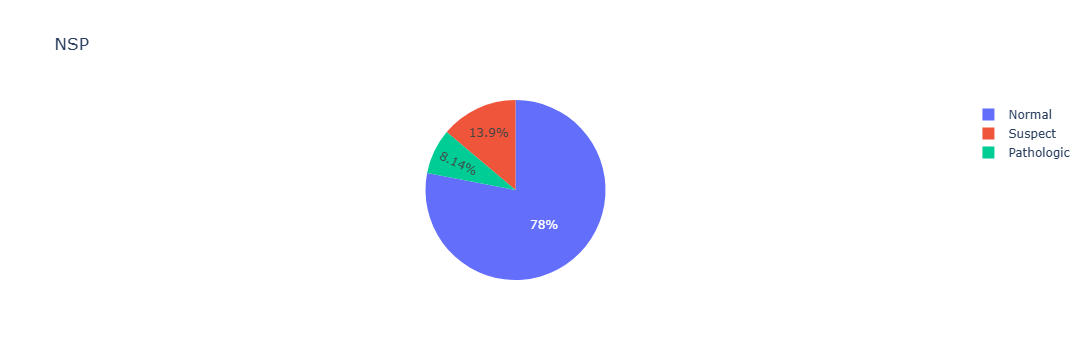

In [72]:
ax=px.pie(df_filtered,names="Category" ,title="NSP")
ax.show()

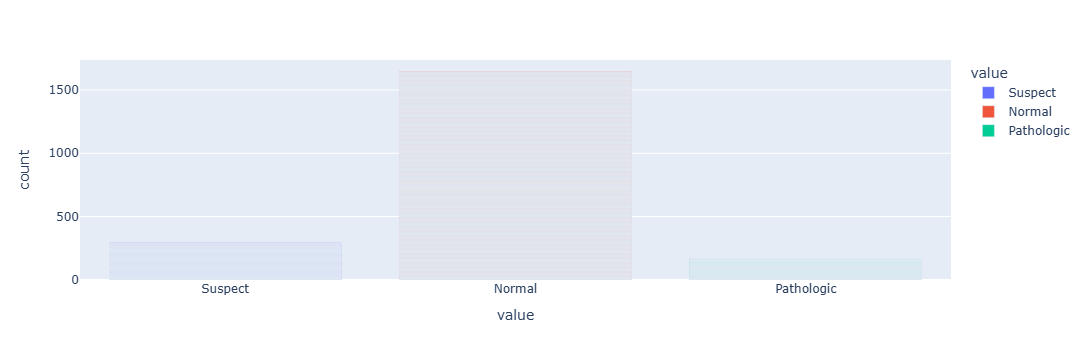

In [73]:
ax=px.bar(df_filtered["Category"],color="value",)
ax.show()

In [74]:
df.drop("cat_lb", inplace=True,axis=1)

In [75]:
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP Category  
0   2.4   64.0  0.999926  2.0  Suspect  
1  10.4  130.0  0.000000  1.0   Normal  
2  13.4  130.0  0.000000  1.0   Normal  
3  23.0  117.0  1.000000  1.0   Normal  
4  19.9  117.0  1.000000  1.0   Normal

In [77]:
corr = df.select_dtypes(include=['number']).corr()

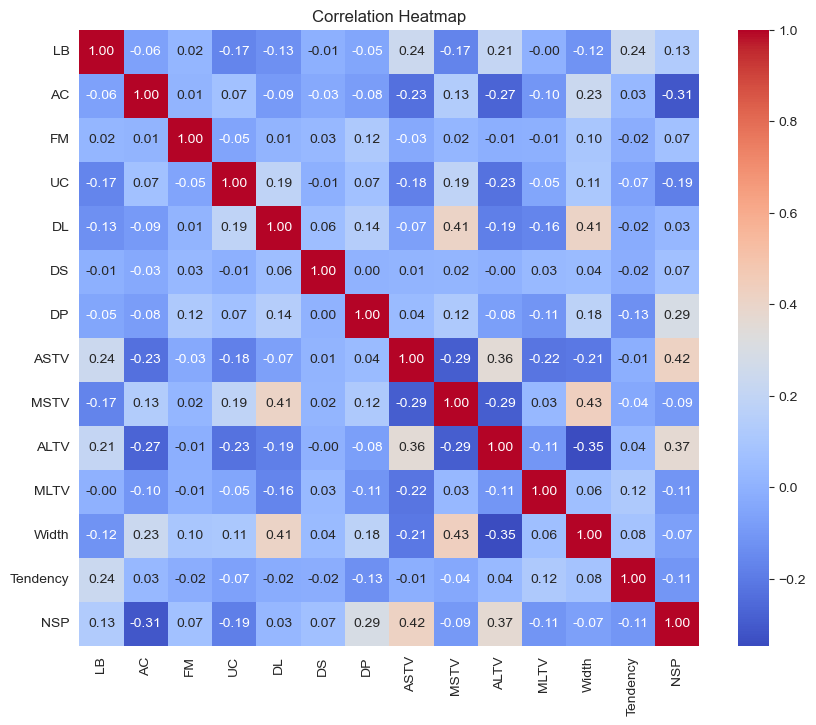

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

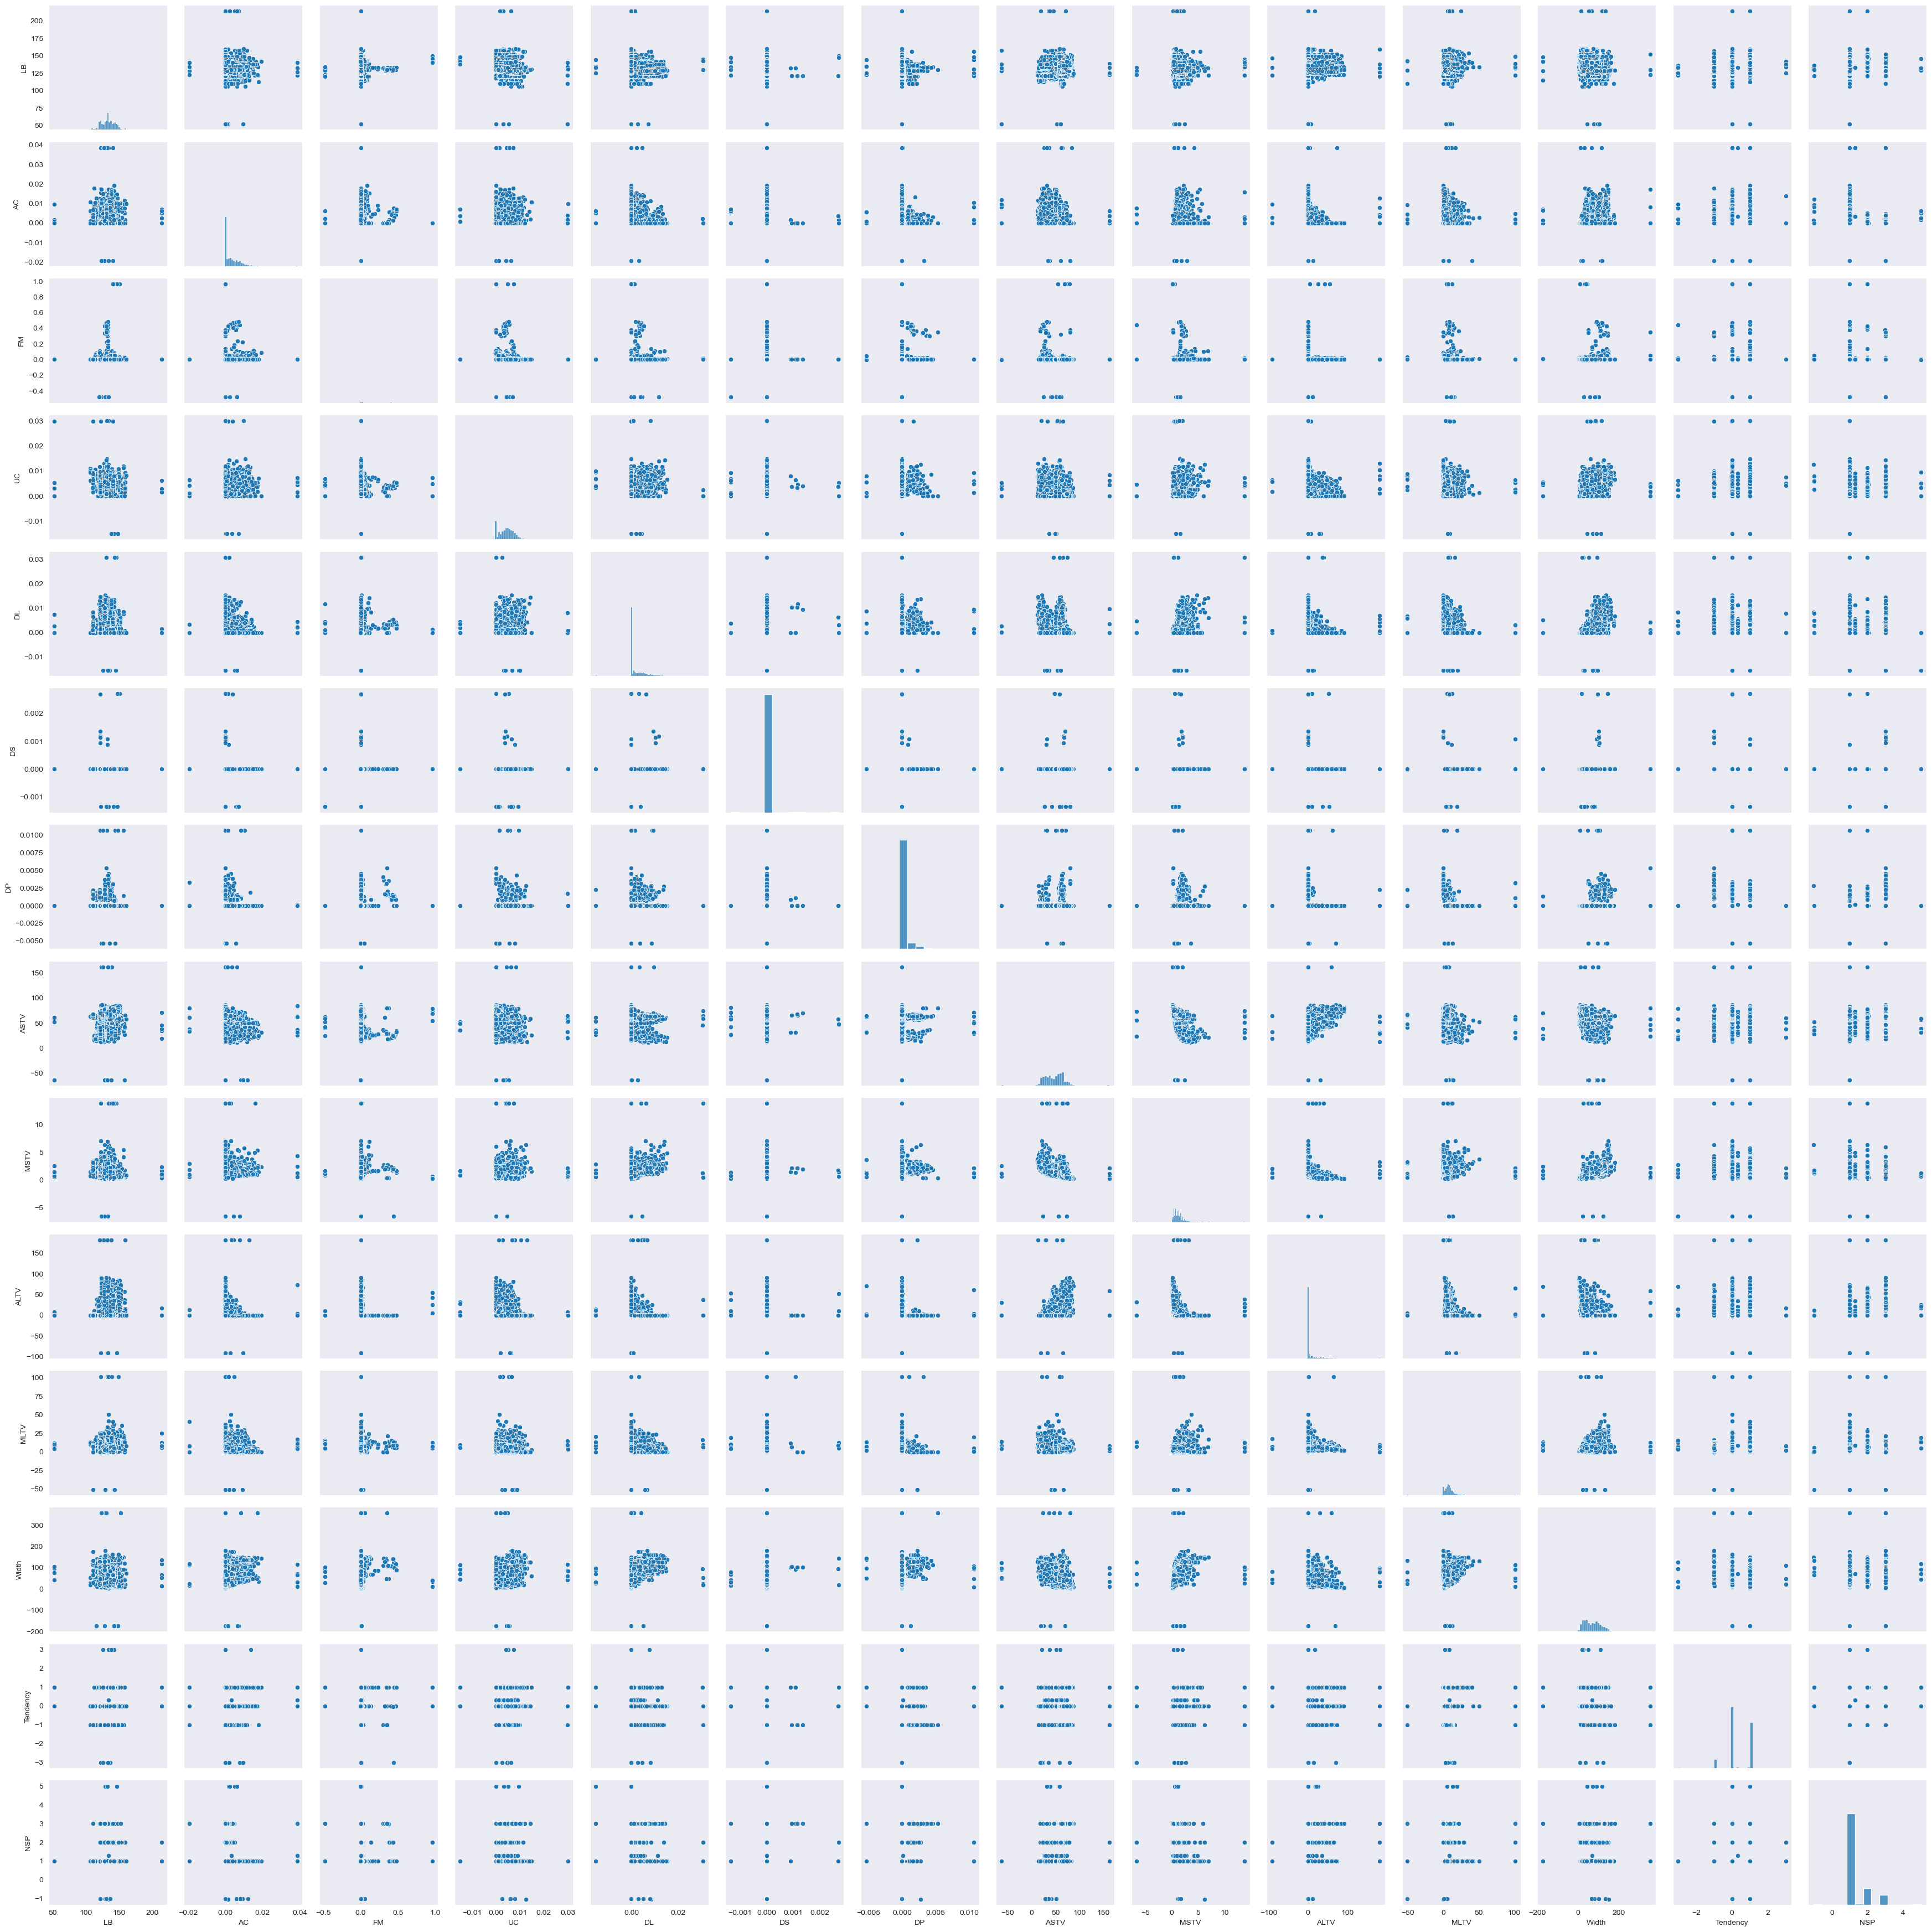

In [80]:
ax = sns.pairplot(df)
ax.fig.tight_layout()
plt.show()

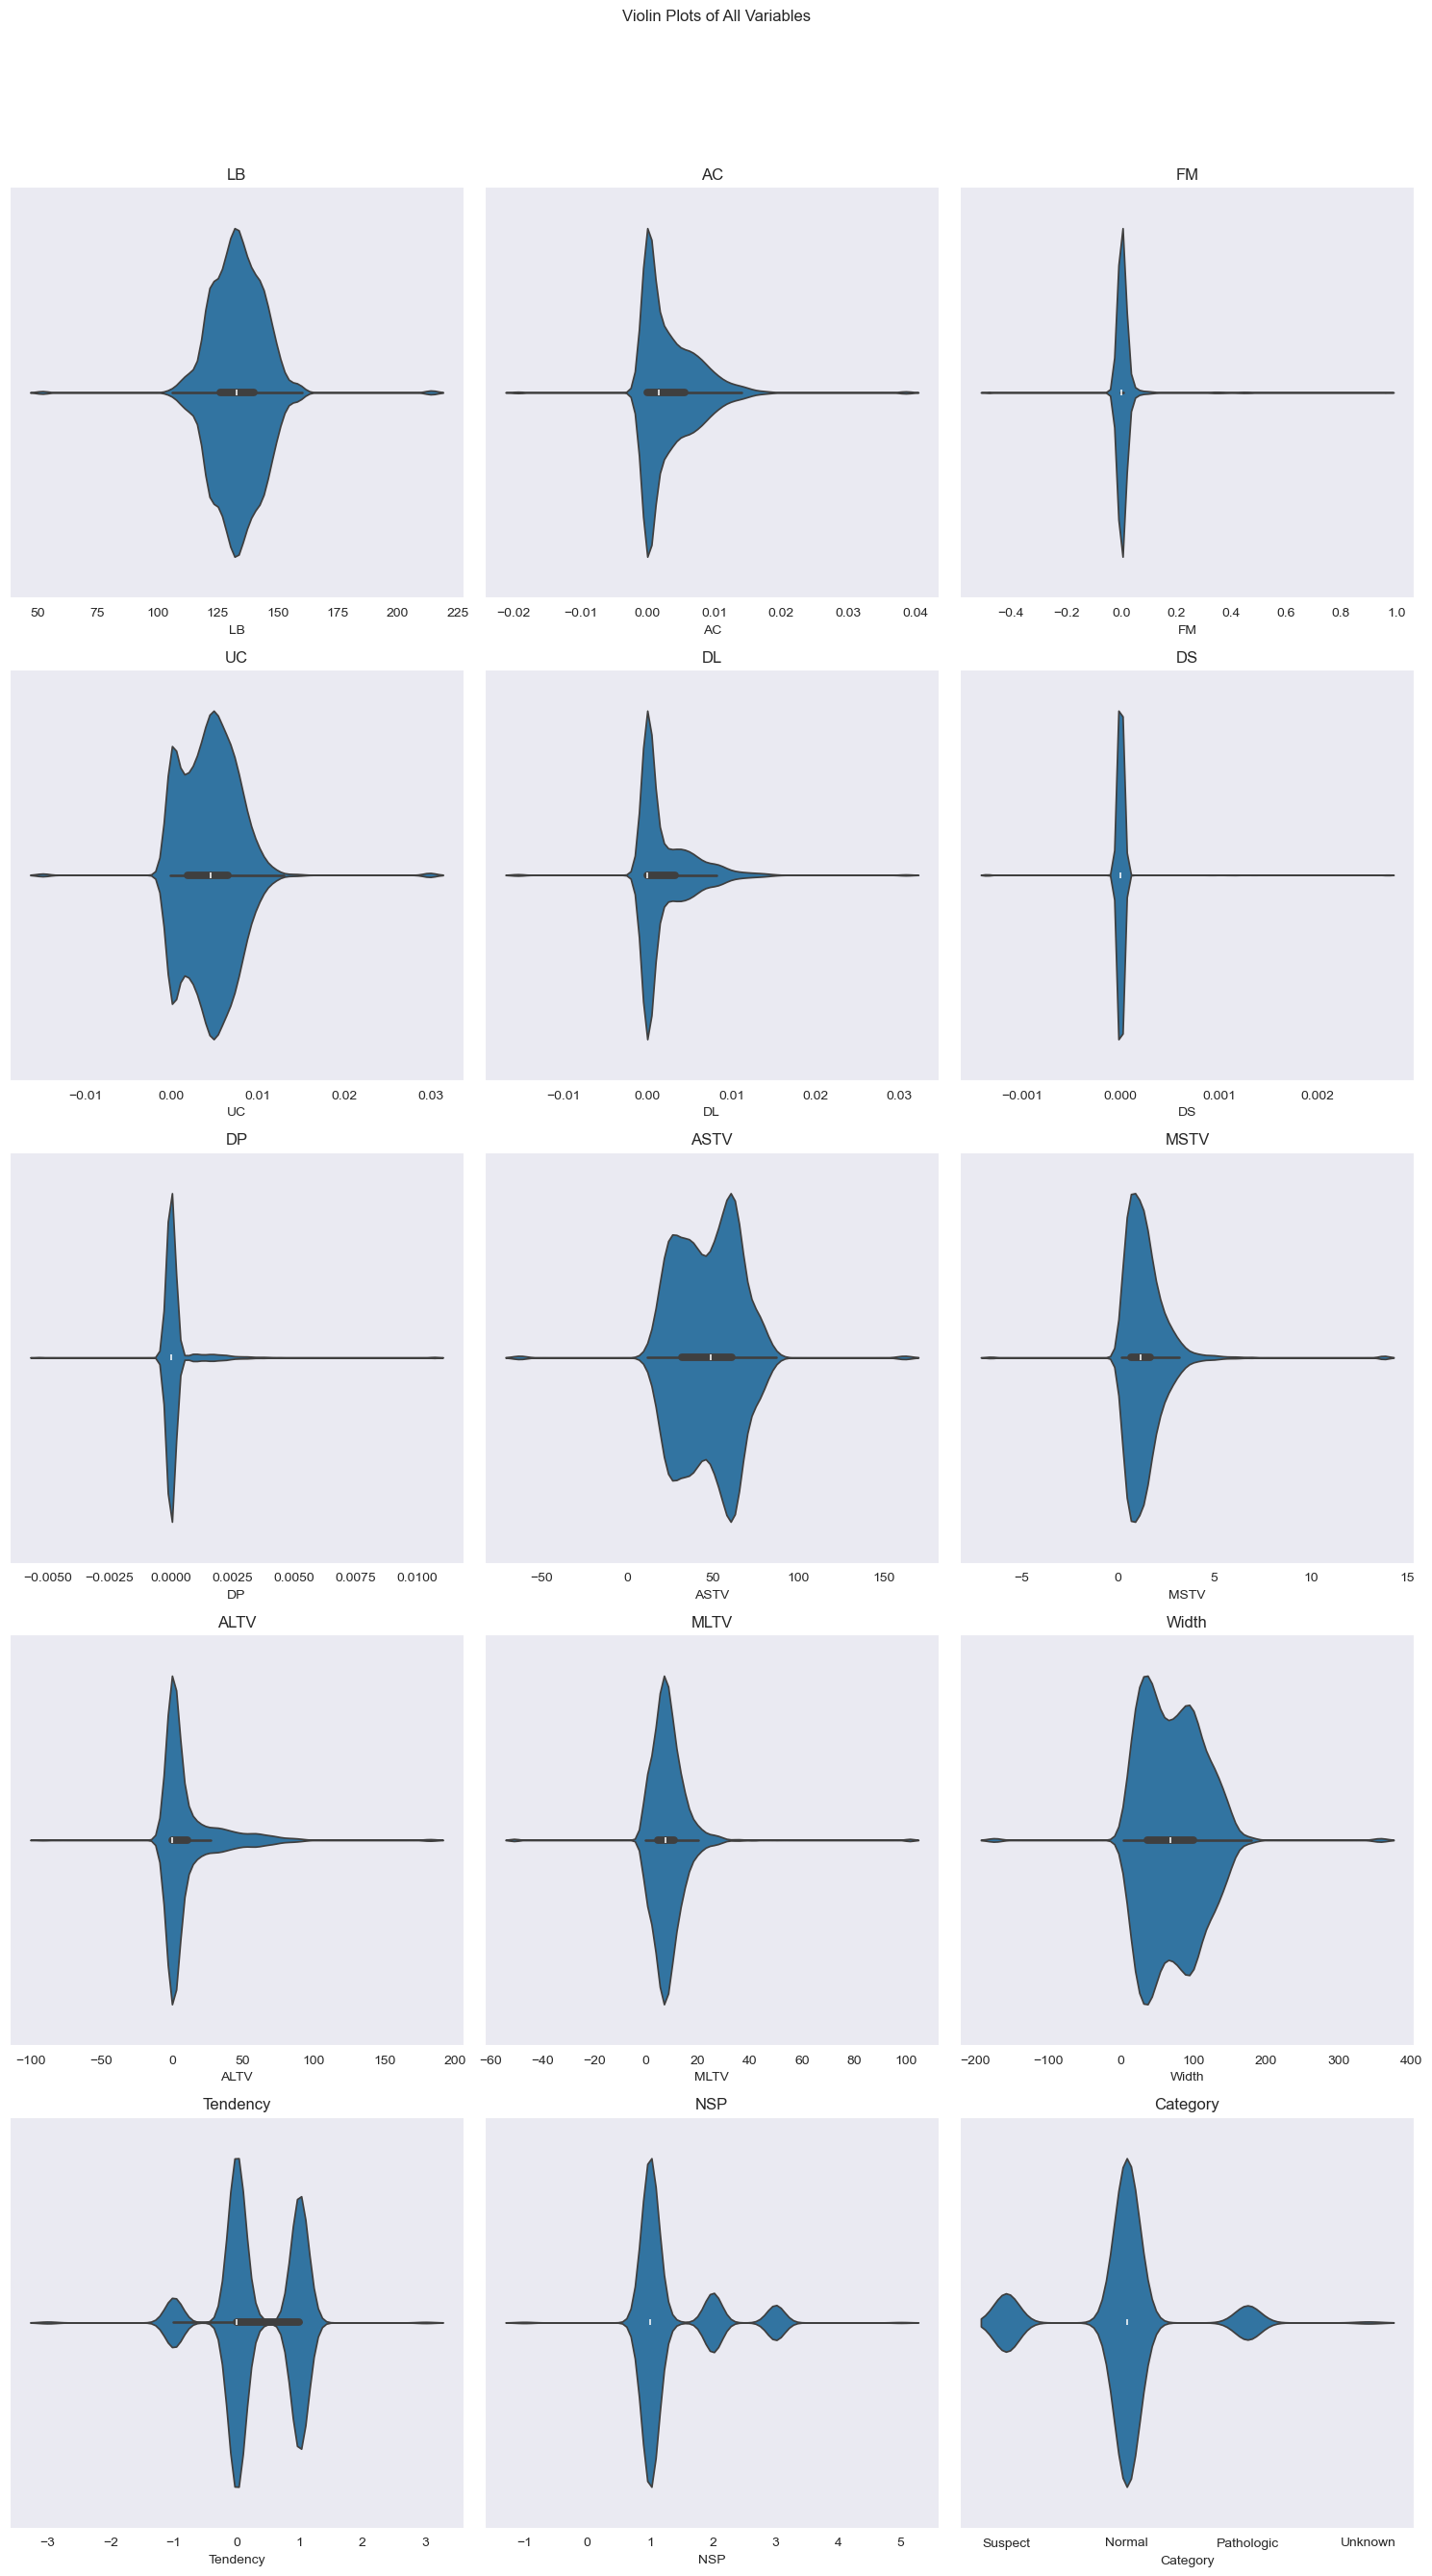

In [81]:
plt.figure(figsize=(15, 5 * len(df.columns)))
for i, feature in enumerate(df.columns):
    plt.subplot(len(df.columns),3,i+1)
    sns.violinplot(x=df[feature])
    plt.title(feature)

plt.tight_layout()
plt.suptitle('Violin Plots of All Variables', y=1.02)
plt.show()

# key insights

#### we can observe that dl ds dp are independ feacture that dont have the corrlection
####  even nsp is indepent feature
#### we need some more information to classfication above data to categrical data so we can remove the outliers easyly

# conclusions

#### it is very hard to remove the outerliers because  when we try to remove outliers almost 70% data is deleting
#### it is due to some categrical data provided in the float values and there is no sufficent information to divide so it is better to provide some information 